In [1]:
import pandas as pd

ECLO_df = pd.read_csv('train.csv')

# <span style="color: violet;"> 데이터 살펴 보기 </span>

In [2]:
ECLO_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [3]:
ECLO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

### 22개 columns 과 39609개의 row를 갖고 있음.
### 피해 운전자 차종, 성별, 연령, 상해정도가 38618개의 row로 <span style="color: red;">991개의 차이</span>가나나 
### 혼자 사고난 거라 볼 수 있으므로 결측치 처리하면 안됨. 

# <span style="color: violet;"> 데이터 가공</span>

### 학습/예측/평가 에 필요없는 칼럼을 제거해보자.
### ELCO 수치에 직접적으로 연관없는 Columns은 test.csv파일기준으로 
### <span style="color: red;">(사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형) 을 제외한</span>
## 'ID', '사고유형 - 세부분류', '법규위반', 가해운전자 차종', '가해운전자 성별', '가해운전자 연령'
## '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
## '피해운전자 상해정도', '사망자수', '중상자수', '경상자수' ,  '부상자수'
### 라 할 수 있다. 이를 제거하자.

In [4]:
ECLO_df.drop(['ID','사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도','피해운전자 차종', '피해운전자 성별','피해운전자 연령', '피해운전자 상해정도','사망자수','중상자수','경상자수','부상자수'], axis=1, inplace = True)

In [5]:
ECLO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사고일시    39609 non-null  object
 1   요일      39609 non-null  object
 2   기상상태    39609 non-null  object
 3   시군구     39609 non-null  object
 4   도로형태    39609 non-null  object
 5   노면상태    39609 non-null  object
 6   사고유형    39609 non-null  object
 7   ECLO    39609 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 2.4+ MB


## 이제 각각의 데이터를 살펴보자.
### 또한, 학습/예측/평가를 하기 위해서는 수치형 데이터로 인코딩 되어야 하므로 이를 수치화 시킨다.

In [6]:
ECLO_df['사고일시']

0        2019-01-01 00
1        2019-01-01 00
2        2019-01-01 01
3        2019-01-01 02
4        2019-01-01 04
             ...      
39604    2021-12-31 19
39605    2021-12-31 19
39606    2021-12-31 21
39607    2021-12-31 22
39608    2021-12-31 23
Name: 사고일시, Length: 39609, dtype: object

### 년 월 일 시 로 되어있다. 이를 각각 나눠 columns로 다시 추가해주자.

In [7]:
#문자열을 datetime 타입으로 변경
ECLO_df['사고일시']=ECLO_df.사고일시.apply(pd.to_datetime)

#datetime 타입에서 년, 월, 일, 시간 추출
ECLO_df['year']=ECLO_df.사고일시.apply(lambda x : x.year)
ECLO_df['month']=ECLO_df.사고일시.apply(lambda x : x.month)
ECLO_df['day']=ECLO_df.사고일시.apply(lambda x : x.day)
ECLO_df['hour']=ECLO_df.사고일시.apply(lambda x : x.hour)
ECLO_df.head(3)

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,ECLO,year,month,day,hour
0,2019-01-01 00:00:00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,5,2019,1,1,0
1,2019-01-01 00:00:00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,3,2019,1,1,0
2,2019-01-01 01:00:00,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,3,2019,1,1,1


### 이제 사고일시 컬럼은 삭제 해주자.

In [8]:
ECLO_df.drop('사고일시', axis=1, inplace = True)

In [9]:
ECLO_df.head(3)

,요일,기상상태,시군구,도로형태,노면상태,사고유형,ECLO,year,month,day,hour
0,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,5,2019,1,1,0
1,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,3,2019,1,1,0
2,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,3,2019,1,1,1


In [10]:
ECLO_df['요일']

0        화요일
1        화요일
2        화요일
3        화요일
4        화요일
        ... 
39604    금요일
39605    금요일
39606    금요일
39607    금요일
39608    금요일
Name: 요일, Length: 39609, dtype: object

### 문자열로 되어있으므로 월요일='1' ~ 일요일='7'로 바꾼다

In [11]:
# 요일을 숫자로 매핑하는 딕셔너리
day_to_num = {
    '월요일': 1,
    '화요일': 2,
    '수요일': 3,
    '목요일': 4,
    '금요일': 5,
    '토요일': 6,
    '일요일': 7
}

ECLO_df['요일'] = ECLO_df['요일'].replace(day_to_num)

In [12]:
ECLO_df['요일']

0        2
1        2
2        2
3        2
4        2
        ..
39604    5
39605    5
39606    5
39607    5
39608    5
Name: 요일, Length: 39609, dtype: int64

In [13]:
ECLO_df['기상상태']

0        맑음
1        흐림
2        맑음
3        맑음
4        맑음
         ..
39604    맑음
39605    맑음
39606    맑음
39607    맑음
39608    맑음
Name: 기상상태, Length: 39609, dtype: object

In [14]:
ECLO_df['기상상태'].unique()

array(['맑음', '흐림', '기타', '비', '안개', '눈'], dtype=object)

### 문자열로 되어있으므로 맑음='1' ~ 눈='6'로 바꾼다

In [15]:
# 날씨 숫자로 매핑하는 딕셔너리
weather_to_num = {
    '맑음': 1,
    '흐림': 2,
    '기타': 3,
    '비': 4,
    '안개': 5,
    '눈': 6,
}

ECLO_df['기상상태'] = ECLO_df['기상상태'].replace(weather_to_num)

In [16]:
ECLO_df['기상상태']

0        1
1        2
2        1
3        1
4        1
        ..
39604    1
39605    1
39606    1
39607    1
39608    1
Name: 기상상태, Length: 39609, dtype: int64

In [17]:
ECLO_df['시군구']

0           대구광역시 중구 대신동
1          대구광역시 달서구 감삼동
2          대구광역시 수성구 두산동
3           대구광역시 북구 복현동
4           대구광역시 동구 신암동
              ...       
39604    대구광역시 수성구 수성동3가
39605      대구광역시 달서구 상인동
39606      대구광역시 달서구 월성동
39607       대구광역시 달서구 장동
39608       대구광역시 서구 비산동
Name: 시군구, Length: 39609, dtype: object

## 대구광역시는 공통적이므로 지우고 구와 동을 분리하자.

In [18]:
ECLO_df[['시', '구', '동']] = ECLO_df['시군구'].str.split(expand=True)
ECLO_df.drop('시', axis=1, inplace=True) # '시' 열 제거

In [19]:
ECLO_df.head()

,요일,기상상태,시군구,도로형태,노면상태,사고유형,ECLO,year,month,day,hour,구,동
0,2,1,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,5,2019,1,1,0,중구,대신동
1,2,2,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,3,2019,1,1,0,달서구,감삼동
2,2,1,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,3,2019,1,1,1,수성구,두산동
3,2,1,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,5,2019,1,1,2,북구,복현동
4,2,1,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,3,2019,1,1,4,동구,신암동


In [20]:
ECLO_df['구'].unique()

array(['중구', '달서구', '수성구', '북구', '동구', '서구', '달성군', '남구'], dtype=object)

###  구도 문자열로 되어있으므로 중구 ='1' ~ 남구='8'로 바꾼다

In [21]:
# 구이름 숫자로 매핑하는 딕셔너리
gu_to_num = {
    '중구': 1,
    '달서구': 2,
    '수성구': 3,
    '북구': 4,
    '동구': 5,
    '서구': 6,
    '달성군' : 7,
    '남구' :8
}

ECLO_df['구'] = ECLO_df['구'].replace(gu_to_num)

In [22]:
ECLO_df['구']

0        1
1        2
2        3
3        4
4        5
        ..
39604    3
39605    2
39606    2
39607    2
39608    6
Name: 구, Length: 39609, dtype: int64

In [23]:
ECLO_df['동'].unique()

array(['대신동', '감삼동', '두산동', '복현동', '신암동', '지산동', '상인동', '태전동', '지묘동',
       '평리동', '신기동', '상리동', '월성동', '황금동', '구암동', '신천동', '만촌동', '남산동',
       '비산동', '침산동', '두류동', '신매동', '대곡동', '유가읍', '논공읍', '율하동', '시지동',
       '봉무동', '다사읍', '동산동', '이현동', '이천동', '수성동4가', '노원동3가', '서변동', '관음동',
       '학정동', '파동', '상동', '이곡동', '효목동', '읍내동', '남성로', '죽전동', '대명동', '동천동',
       '지저동', '사수동', '덕산동', '본리동', '용계동', '범어동', '신당동', '성당동', '용산동',
       '태평로3가', '도학동', '욱수동', '불로동', '칠성동1가', '장기동', '매호동', '대천동',
       '삼덕동1가', '수성동2가', '팔달동', '삼덕동', '진천동', '수성동3가', '가창면', '방촌동',
       '산격동', '월암동', '현풍읍', '구지면', '매천동', '송현동', '고성동3가', '봉덕동', '칠성동2가',
       '공평동', '봉산동', '괴전동', '국우동', '대현동', '노원동1가', '대봉동', '본동', '신서동',
       '검단동', '화원읍', '동호동', '삼덕동2가', '입석동', '중동', '삼덕동3가', '파호동', '동내동',
       '하빈면', '율암동', '동인동1가', '내당동', '유천동', '호산동', '교동', '옥포읍', '원대동3가',
       '검사동', '동인동4가', '수성동1가', '고성동2가', '각산동', '중리동', '고성동1가', '갈산동',
       '대림동', '호림동', '연호동', '동변동', '범물동', '계산동2가', '동문동', '고모동', '금호동',
 

In [24]:
len(ECLO_df['동'].unique())

196

## 너무 많다 위의 방식으로 하기가 힘들다.
## 레이블인코더 사이킷런 방식을 가져와서 해보자"

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [26]:
ECLO_df['동'] = le.fit_transform(ECLO_df['동'])

In [27]:
ECLO_df['동']

0         40
1          4
2         66
3         79
4        129
        ... 
39604    118
39605    103
39606    144
39607    158
39608     89
Name: 동, Length: 39609, dtype: int32

### 이제 시군구 컬럼은 삭제 해주자.

In [28]:
ECLO_df.drop('시군구', axis=1, inplace = True)

In [29]:
ECLO_df['도로형태']  

0               단일로 - 기타
1               단일로 - 기타
2               단일로 - 기타
3               단일로 - 기타
4               단일로 - 기타
              ...       
39604         교차로 - 교차로안
39605           단일로 - 기타
39606         교차로 - 교차로안
39607            기타 - 기타
39608    단일로 - 지하차도(도로)내
Name: 도로형태, Length: 39609, dtype: object

### 단일로에서도 기타와 지하차도(도로)내가 분리되어 있다 이를 분리하자

In [30]:
ECLO_df[['대분류', '소분류']] = ECLO_df['도로형태'].str.split(' - ', expand=True)

In [31]:
ECLO_df['대분류'].unique()

array(['단일로', '교차로', '기타', '주차장', '미분류'], dtype=object)

In [32]:
ECLO_df['대분류'] = le.fit_transform(ECLO_df['대분류'])

In [33]:
ECLO_df['대분류']

0        2
1        2
2        2
3        2
4        2
        ..
39604    0
39605    2
39606    0
39607    1
39608    2
Name: 대분류, Length: 39609, dtype: int32

In [34]:
ECLO_df['소분류'].unique()

array(['기타', '교차로안', '터널', '지하차도(도로)내', '교량', '교차로횡단보도내', '주차장', '교차로부근',
       '고가도로위', '미분류'], dtype=object)

In [35]:
ECLO_df['소분류'] = le.fit_transform(ECLO_df['소분류'])

In [36]:
ECLO_df['소분류']

0        5
1        5
2        5
3        5
4        5
        ..
39604    3
39605    5
39606    3
39607    5
39608    8
Name: 소분류, Length: 39609, dtype: int32

### 이제 도로형태 컬럼은 삭제 해주자.

In [37]:
ECLO_df.drop('도로형태', axis=1, inplace = True)

In [38]:
ECLO_df['노면상태'].unique()

array(['건조', '젖음/습기', '서리/결빙', '기타', '침수', '적설'], dtype=object)

In [39]:
ECLO_df['노면상태'] = le.fit_transform(ECLO_df['노면상태'])

In [40]:
ECLO_df['노면상태']

0        0
1        0
2        0
3        0
4        0
        ..
39604    0
39605    0
39606    0
39607    0
39608    0
Name: 노면상태, Length: 39609, dtype: int32

In [41]:
ECLO_df['사고유형'].unique()

array(['차대사람', '차대차', '차량단독'], dtype=object)

In [42]:
ECLO_df['사고유형'] = le.fit_transform(ECLO_df['사고유형'])

In [43]:
ECLO_df['사고유형']

0        0
1        0
2        0
3        1
4        1
        ..
39604    1
39605    1
39606    1
39607    1
39608    1
Name: 사고유형, Length: 39609, dtype: int32

In [44]:
ECLO_df.head()

,요일,기상상태,노면상태,사고유형,ECLO,year,month,day,hour,구,동,대분류,소분류
0,2,1,0,0,5,2019,1,1,0,1,40,2,5
1,2,2,0,0,3,2019,1,1,0,2,4,2,5
2,2,1,0,0,3,2019,1,1,1,3,66,2,5
3,2,1,0,1,5,2019,1,1,2,4,79,2,5
4,2,1,0,1,3,2019,1,1,4,5,129,2,5


## 보기 좋게 하기 위해 target값 (ECLO)을 오른쪽으로 옮기자

In [45]:
col_to_move = ECLO_df['ECLO']
ECLO_df.drop(labels=['ECLO'], axis=1, inplace=True)
ECLO_df['ECLO'] = col_to_move

In [46]:
ECLO_df.head()

,요일,기상상태,노면상태,사고유형,year,month,day,hour,구,동,대분류,소분류,ECLO
0,2,1,0,0,2019,1,1,0,1,40,2,5,5
1,2,2,0,0,2019,1,1,0,2,4,2,5,3
2,2,1,0,0,2019,1,1,1,3,66,2,5,3
3,2,1,0,1,2019,1,1,2,4,79,2,5,5
4,2,1,0,1,2019,1,1,4,5,129,2,5,3


### 이제 데이터 수치인코딩이 끝났다. 시각화를 해보자.

# <span style="color: violet;"> 데이터 시각화</span>

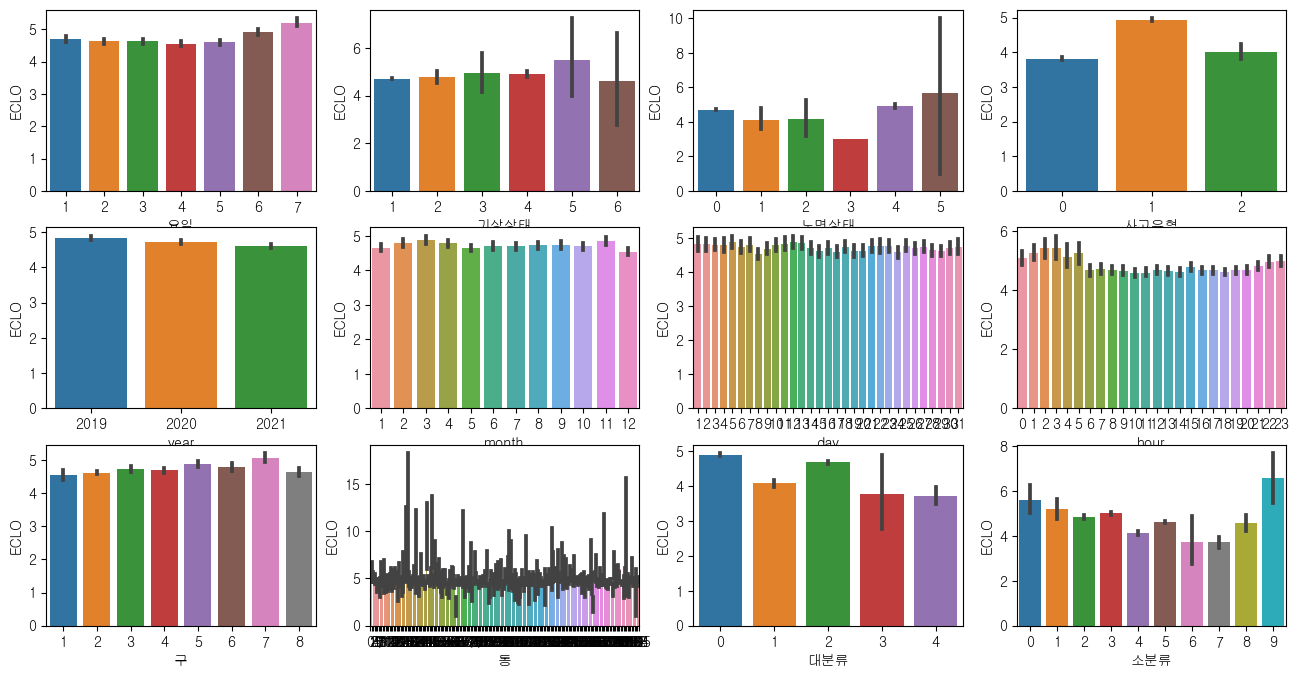

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Gulim'

fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows =3)
cat_features = ['요일', '기상상태','노면상태', '사고유형', 'year','month', 'day', 'hour','구','동', '대분류','소분류']
#cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row=int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y = 'ECLO', data=ECLO_df, ax=axs[row][col])

## 노면상태, 동에서 이상치가 보이는듯 하고 소분류(도로형태)에서는 좀 차이가 나는듯하다.
## 일단은 이상치 제거 없이 예측 평가해보자.

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso


#log 값 변환 시 Nan등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y,pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

#사이킷런의 mean_square_error()를 이용해 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

#MSE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val =rmsle(y,pred)
    rmse_val=rmse(y,pred)
    #MAE 는 사이킷런의 mean_absolute_error()로 계산
    mae_val=mean_absolute_error(y,pred)
    print('RMSLE:{0:.3f}, RMSE:{1:.3F}, MAE:{2:.3F}'.format(rmsle_val,rmse_val,mae_val))
    
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred=model.predict(X_test)

    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)
#모델별로 평가 수행
lr_reg=LinearRegression()
ridge_reg=Ridge()
lasso_reg=Lasso()



In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = ECLO_df['ECLO']
X_features = ECLO_df.drop(['ECLO'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3,
                                                   random_state=0)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test)

### LinearRegression ###
RMSLE:0.462, RMSE:3.204, MAE:2.145
### Ridge ###
RMSLE:0.462, RMSE:3.204, MAE:2.145
### Lasso ###
RMSLE:0.465, RMSE:3.229, MAE:2.153


## |실제값 - 예측값| 가장 큰 5가지 경우 가져와 보자

In [50]:
def get_top_error_data(y_test,pred,n_tops=5):
    #DataFrame의 칼럼으로 실제 대여회수(count)와 예측값을 서로 비교할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])
    
# 예측값과 실제 값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff',ascending=False)[:n_tops])
    
pred = lr_reg.predict(X_test)

get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count  diff
4131          74              5.0  69.0
5724          65              6.0  59.0
2210          56              5.0  51.0
8072          37              5.0  32.0
6866          36              5.0  31.0


<Axes: >

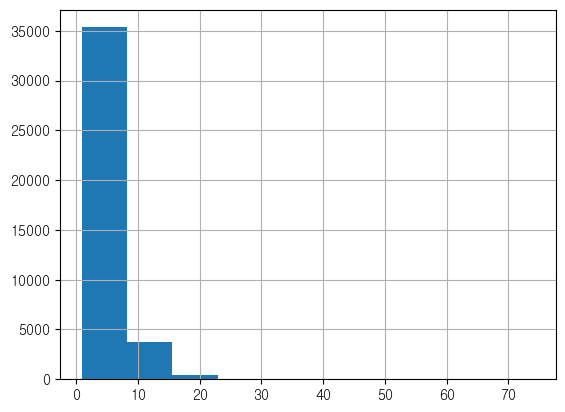

In [51]:
y_target.hist()

## 긴꼬리 형태를 가지고 있다. 이상치를 처리해주자.

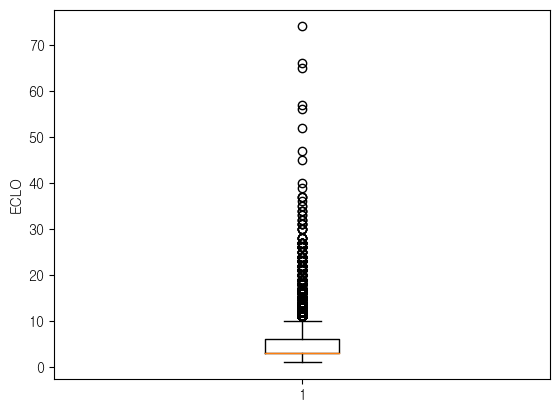

In [52]:
plt.boxplot(y_target)

plt.ylabel('ECLO') 

plt.show()

In [53]:
# ECLO 값이 10 초과 20이하인 항목의 개수 계산
count = ECLO_df[(ECLO_df['ECLO'] > 10) & (ECLO_df['ECLO'] <= 20)].shape[0]

count

1970

In [54]:
# ECLO 값이 20초과인 항목의 개수 계산
count = ECLO_df[(ECLO_df['ECLO'] > 20)].shape[0]

count

154

In [55]:
# ECLO 값이 20초과인 항목의 개수 계산
count = ECLO_df[(ECLO_df['ECLO'] > 10)].shape[0]

count

2124

### 10초과인 값들은 평균값으로 바꿔주자.

In [56]:
eclo_mean =y_target.mean() 
eclo_mean

4.726703526976192

In [57]:
y_target_transform = y_target.copy()
y_target_transform[y_target > 10] = eclo_mean

In [58]:
y_target_transform.unique()

array([ 5.        ,  3.        ,  6.        ,  4.72670353,  9.        ,
        8.        ,  2.        ,  1.        ,  7.        ,  4.        ,
       10.        ])

<Axes: >

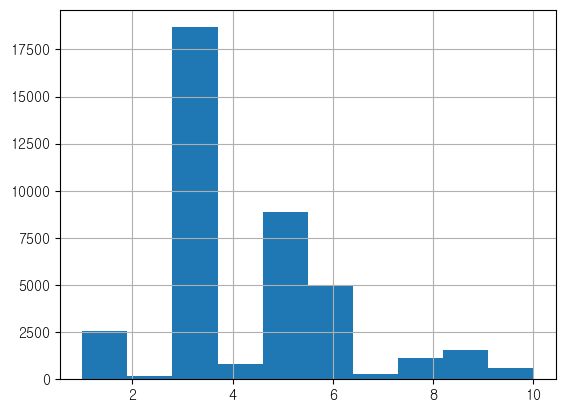

In [59]:
y_target_transform.hist()

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_features = ECLO_df.drop(['ECLO'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_transform, test_size=0.3,
                                                   random_state=0)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test)

### LinearRegression ###
RMSLE:0.375, RMSE:1.914, MAE:1.557
### Ridge ###
RMSLE:0.375, RMSE:1.914, MAE:1.557
### Lasso ###
RMSLE:0.377, RMSE:1.923, MAE:1.568


## 이전수치
### LinearRegression ###
RMSLE:0.462, RMSE:3.204, MAE:2.145
### Ridge ###
RMSLE:0.462, RMSE:3.204, MAE:2.145
### Lasso ###
RMSLE:0.465, RMSE:3.229, MAE:2.153
#### 좀더 나아짐

### 타겟값을 로그화 시켜 정규 분포화 시켜주자

<Axes: >

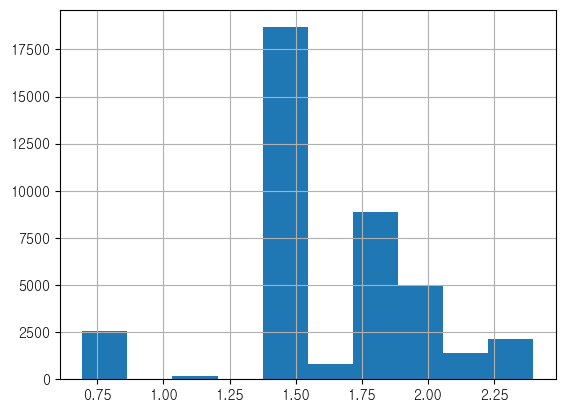

In [61]:
y_log_transform = np.log1p(y_target_transform)
y_log_transform.hist()

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_features = ECLO_df.drop(['ECLO'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_log_transform, test_size=0.3,
                                                   random_state=0)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test)

### LinearRegression ###
RMSLE:0.151, RMSE:0.369, MAE:0.300
### Ridge ###
RMSLE:0.151, RMSE:0.369, MAE:0.300
### Lasso ###
RMSLE:0.151, RMSE:0.370, MAE:0.302


## 이전수치
### LinearRegression ### (오리지널)
RMSLE:0.375, RMSE:1.914, MAE:1.557
### Ridge ###
RMSLE:0.375, RMSE:1.914, MAE:1.557
### Lasso ###
RMSLE:0.377, RMSE:1.923, MAE:1.568
### LinearRegression ### (이상치 제거)
RMSLE:0.462, RMSE:3.204, MAE:2.145
### Ridge ###
RMSLE:0.462, RMSE:3.204, MAE:2.145
### Lasso ###
RMSLE:0.465, RMSE:3.229, MAE:2.153
#### 성능향상이 많이 이루어 졌으나 과적합을 의심?

## 이제 개별 피처들을 원-핫 인코딩화 시켜보자

In [63]:
# ''요일', '기상상태','노면상태', '사고유형', 'year','month', 'day', 'hour','구','동', '대분류','소분류' 등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['요일', '기상상태','노면상태', '사고유형', 'year','month', 'day', 'hour','구','동', '대분류','소분류'])

In [64]:
#원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_log_transform, test_size=0.3,
                                                   random_state=0)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test)
    

### LinearRegression ###
RMSLE:0.151, RMSE:0.369, MAE:0.298
### Ridge ###
RMSLE:0.150, RMSE:0.368, MAE:0.298
### Lasso ###
RMSLE:0.151, RMSE:0.370, MAE:0.302


## 이전수치
### LinearRegression ### (오리지널)
RMSLE:0.375, RMSE:1.914, MAE:1.557
### Ridge ###
RMSLE:0.375, RMSE:1.914, MAE:1.557
### Lasso ###
RMSLE:0.377, RMSE:1.923, MAE:1.568
### LinearRegression ### (이상치 제거)
RMSLE:0.462, RMSE:3.204, MAE:2.145
### Ridge ###
RMSLE:0.462, RMSE:3.204, MAE:2.145
### Lasso ###
RMSLE:0.465, RMSE:3.229, MAE:2.153
### LinearRegression ### (로그화)
RMSLE:0.151, RMSE:0.369, MAE:0.300
### Ridge ###
RMSLE:0.151, RMSE:0.369, MAE:0.300
### Lasso ###
RMSLE:0.151, RMSE:0.370, MAE:0.302
#### 비슷

In [65]:
coef = pd.Series(lr_reg.coef_,index = X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

ValueError: Length of values (311) does not match length of index (12)

In [ ]:
coef = pd.Series(ridge_reg.coef_,index = X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
coef = pd.Series(lasso_reg.coef_,index = X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
def visualize_coefficient(models):
    #3개의 회귀 모델의 시각화를 위헤 3개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출해 회귀계수시각화
    # models 리스트에 있는 모든 회귀 모델을 순회합니다.
    for i_num, model in enumerate(models):
        # 해당 모델의 상위 10개 및 하위 10개 회귀 계수를 가져옵니다.
        # get_top_bottom_coef 함수는 모델을 인자로 받아 두 개의 시리즈(상위 10개, 하위 10개 회귀 계수)를 반환합니다.
        coef_high, coef_low = get_top_bottom_coef(model)

        # 상위 10개와 하위 10개 회귀 계수를 결합합니다.
        # pd.concat 함수는 여러 개의 pandas 객체를 축을 따라 결합합니다. 여기서는 상위와 하위 계수를 세로로 결합합니다.
        coef_concat = pd.concat([coef_high, coef_low])

        # 각 모델에 대한 subplot의 제목을 설정합니다. 
        # 모델의 클래스 이름을 가져와서 제목으로 사용하고, 제목의 크기를 25로 설정합니다.
        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=15)

        # y축의 눈금 설정을 조정합니다. 눈금의 방향을 안으로('in') 설정하고, 눈금 레이블의 위치를 조정하기 위해 pad 값을 -120으로 설정합니다.
        axs[i_num].tick_params(axis='y', direction="in", pad=-120)

        # x축과 y축의 눈금 레이블의 폰트 크기를 조정합니다.
        # get_xticklabels()와 get_yticklabels() 함수를 사용하여 각각의 레이블을 가져온 후, 폰트 크기를 22로 설정합니다.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(12)

        # seaborn의 barplot을 사용하여 회귀 계수를 막대 그래프로 표현합니다.
        # x축에는 계수의 값, y축에는 계수의 이름(인덱스)를 표시합니다. ax=axs[i_num]을 통해 해당 subplot에 그래프를 그립니다.
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

        
# 앞 예제에서 학습한  lr_reg, ridge_reg, lasso_reg모델의 회귀 계수 시각화.
models = [lasso_reg]
visualize_coefficient(models)

In [ ]:
coef = pd.Series(model.coef_, index = X_features.columns)
coef_sort = coef.sort_values(ascending=False)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

## 각 피처의 회귀 계숫값을 시각화 해보자.

## 이전수치
### (original)
### LinearRegression ###
RMSLE:0.462, RMSE:3.204, MAE:2.145
### Ridge ###
RMSLE:0.462, RMSE:3.204, MAE:2.145
### Lasso ###
RMSLE:0.465, RMSE:3.229, MAE:2.153
### (이상치 제거)
### LinearRegression ###
RMSLE:0.375, RMSE:1.914, MAE:1.557
### Ridge ###
RMSLE:0.375, RMSE:1.914, MAE:1.557
### Lasso ###
RMSLE:0.377, RMSE:1.923, MAE:1.568
#### 좀더 나아짐